# Python MySQL Database

#### We need a driver to communicate with my sql server , we can install drivers ,MySQL Connector Python or PyMySQL

## How to connect with the Database ??
#### Following Arguments are required to connect with my sql server 
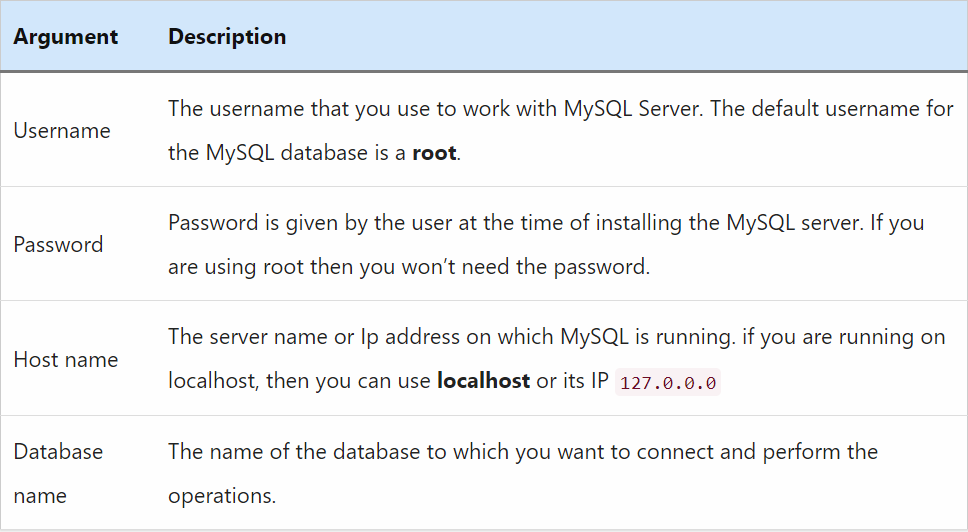

## MySQL Connection 
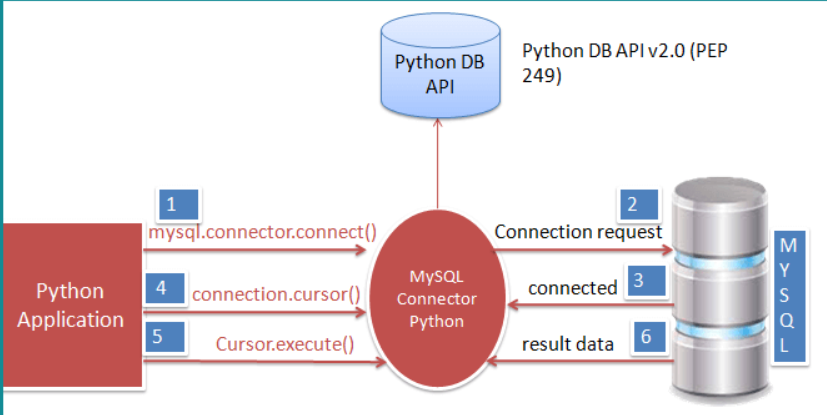

## Creating a Database Electronics

In [2]:
## Connect to Mysql and show all databases
import mysql.connector as conn
from mysql.connector import Error

try:
    connection=conn.connect(host="localhost",
                            username="root")
    print("Connected with Mysql Server")
    cursor=connection.cursor()
    cursor.execute("Show Databases")
    print("Databases are\n",cursor.fetchall())
except Error as e:
    print("Database Error")

Connected with Mysql Server
Databases are
 [('electronics',), ('information_schema',), ('mysql',), ('performance_schema',), ('phpmyadmin',), ('test',)]


In [3]:
## Creating Database Electronics
import mysql.connector as conn
from mysql.connector import Error

try:
    connection=conn.connect(host="localhost",
                            username="root")
    print("Connected with Mysql Server")
    cursor=connection.cursor()
    cursor.execute("create Database electronics")
    print("Database created!!!!!!")
    print("Databases are\n",cursor.fetchall())
except Error as e:
    print("Database Error")

Connected with Mysql Server
Database Error


In [4]:
## Connecting to Database Electronics
import mysql.connector as conn
from mysql.connector import Error

try:
    connection=conn.connect(host="localhost",
                            username="root",
                            database="electronics")
    print("Connected with Mysql Server")
    cursor=connection.cursor()
    cursor.execute("select database();")
    record = cursor.fetchall()
    print("You're connected to database: ", record)
except Error as e:
    print("Database Error")

Connected with Mysql Server
You're connected to database:  [('electronics',)]


## Use the Dictionary to keep MySQL Connection arguments

#### If you have lots of connection arguments, it’s best to keep them in a dictionary and use the ** operator.  for example, you know you require a minimum of four arguments  (i.e., username, password, hostname, database name) to connect MySQL.

In [5]:
## Connect to Database Electronics and check if connection is established or not 
'''
# Replace these values with your actual database information
db_config = {
    'host': 'your_host',
    'user': 'your_username',
    'password': 'your_password',
    'database': 'your_database',
}
# Connect to the database
connection = mysql.connector.connect(**db_config)
'''
import mysql.connector
from mysql.connector import Error

try:
    connection = mysql.connector.connect(host='localhost',
                                         database='electronics',
                                         username='root',
                                         )
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")

Connected to MySQL Server version  5.5.5-10.4.28-MariaDB
You're connected to database:  ('electronics',)
MySQL connection is closed


## Creating a Table laptop in electronics database

In [7]:
import mysql.connector as con
from mysql.connector import Error
db_config={"host":"localhost",
           "username":"root",
           "database":"electronics"}

try:
    connection=conn.connect(**db_config)
    if connection.is_connected():
        print("Connected to Database Electronics")
        cursor=connection.cursor()
        record=cursor.execute("""CREATE TABLE Laptop ( 
                             Id int(11) NOT NULL,
                             Name varchar(250) NOT NULL,
                             Price float NOT NULL,
                             Purchase_date Date NOT NULL,
                             PRIMARY KEY (Id))""")
except mysql.connector.Error as error:
    print("Failed to create table in MySQL: {}".format(error))
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")


Connected to Database Electronics
Failed to create table in MySQL: 1050 (42S01): Table 'laptop' already exists
MySQL connection is closed


## Python MySQL CRUD Operation

## Insert operations
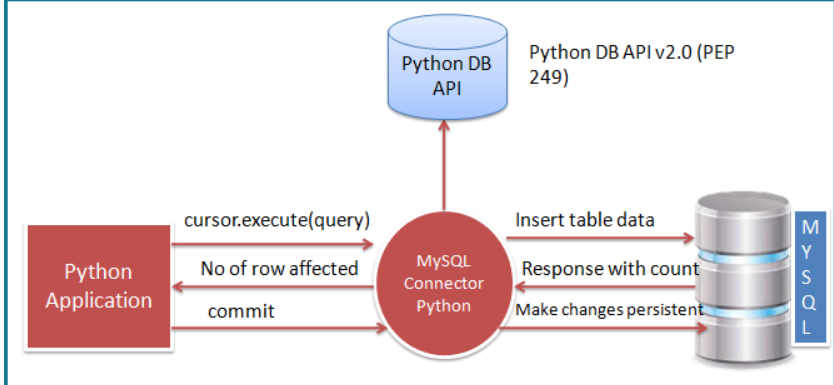

In [8]:
## insert operation
import mysql.connector as con
from mysql.connector import Error

try:
    print("Trying to connect MySQL server......")
    conn=con.connect(**db_config)
    if conn.is_connected():
        print("Connected to Database Electronics")
        cur=conn.cursor()
        query="insert into laptop (id,name,price,purchase_date) values (13,'Lenovo',200000,'2019-08-14')"
        record=cur.execute(query)
        conn.commit()
        print("Query Inserted Successfully ", cur.rowcount)
        

except Error as e:
    print("Failed to insert Query in Table {}".format(e))

finally:
    if conn.is_connected():
        cur.close()
        conn.close()
        print("Connection is closed.....")


Trying to connect MySQL server......
Connected to Database Electronics
Query Inserted Successfully  1
Connection is closed.....


In [9]:
### Perameterized Insert Query in python

import mysql.connector as con
from mysql.connector import Error

data=(132,'Lenovo TF',200000,'2019-08-14')


try:
    print("Trying to connect MySQL server......")
    conn=con.connect(**db_config)
    if conn.is_connected():
        print("Connected to Database Electronics")
        cur=conn.cursor()
        query="insert into laptop (id,name,price,purchase_date) values (%s, %s, %s, %s)"
        record=cur.execute(query,data)
        conn.commit()
        print("Query Inserted Successfully ", cur.rowcount)
        

except Error as e:
    print("Failed to insert Query in Table {}".format(e))

finally:
    if conn.is_connected():
        cur.close()
        conn.close()
        print("Connection is closed.....")


Trying to connect MySQL server......
Connected to Database Electronics
Query Inserted Successfully  1
Connection is closed.....


In [10]:
### Perameterized many Insert Query in python

import mysql.connector as con
from mysql.connector import Error

data=[(137,'Lenovo ',200000,'2019-08-14'),
      (135,'Lenovo ',200000,'2019-08-14'),
      (134,'Lenovo ',200000,'2019-08-14'),
      (133,'HP',200000,'2019-08-14'),
      (131,'HP Latitude',200000,'2019-08-14')]


try:
    print("Trying to connect MySQL server......")
    conn=con.connect(**db_config)
    if conn.is_connected():
        print("Connected to Database Electronics")
        cur=conn.cursor()
        query="insert into laptop (id,name,price,purchase_date) values (%s, %s, %s, %s)"
        record=cur.executemany(query,data)
        conn.commit()
        print("Query Inserted Successfully ", cur.rowcount)
        

except Error as e:
    print("Failed to insert Query in Table {}".format(e))

finally:
    if conn.is_connected():
        cur.close()
        conn.close()
        print("Connection is closed.....")


Trying to connect MySQL server......
Connected to Database Electronics
Query Inserted Successfully  5
Connection is closed.....


In [11]:
### Perameterized Insert Query in python

import mysql.connector as con
from mysql.connector import Error
from datetime import datetime
data=(132,'Lenovo TF',200000,'2019-08-14')


try:
    print("Trying to connect MySQL server......")
    conn=con.connect(**db_config)
    if conn.is_connected():
        print("Connected to Database Electronics")
        cursor = conn.cursor()
        query="insert into laptop (id,name,price,purchase_date) values (%s, %s, %s, %s)"
        
        current_Date = datetime.now()
        # convert date in the format you want
        formatted_date = current_Date.strftime('%Y-%m-%d %H:%M:%S')
        insert_tuple = (7, 'Acer Predator Triton', 2435, current_Date)

        result = cursor.execute(query, insert_tuple)
        conn.commit()
        print("Date Record inserted successfully")

except mysql.connector.Error as error:
    conn.rollback()
    print("Failed to insert into MySQL table {}".format(error))

finally:
    if conn.is_connected():
        cursor.close()
        conn.close()
        print("MySQL connection is closed")


Trying to connect MySQL server......
Connected to Database Electronics
Date Record inserted successfully
MySQL connection is closed


## Select Statments
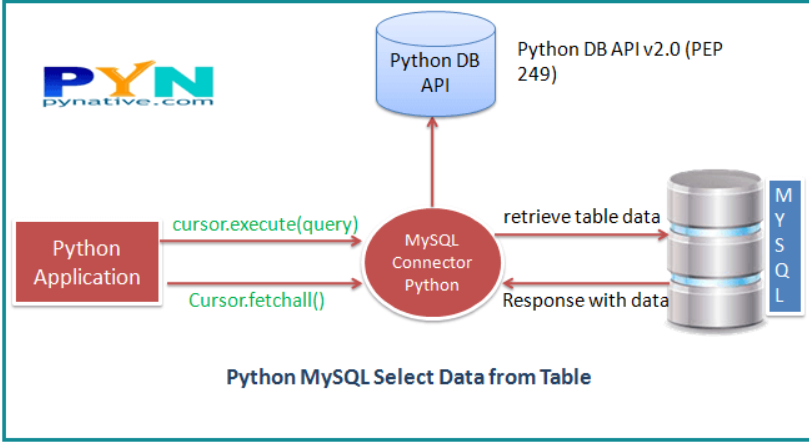

In [12]:
## Select FetchAll 
## Connection is configure above
import mysql.connector

try:
    connection=mysql.connector.connect(**db_config)
    sql_select_Query = "select * from Laptop"
    cursor = connection.cursor()
    cursor.execute(sql_select_Query)
    # get all records
    records = cursor.fetchall()
    print("Total number of rows in table: ", cursor.rowcount)

    print("\nPrinting each row")
    for row in records:
        print("Id = ", row[0], )
        print("Name = ", row[1])
        print("Price  = ", row[2])
        print("Purchase date  = ", row[3], "\n")

except mysql.connector.Error as e:
    print("Error reading data from MySQL table: {}".format(e))
finally:
    if connection.is_connected():
        connection.close()
        cursor.close()
        print("MySQL connection is closed")

Total number of rows in table:  8

Printing each row
Id =  7
Name =  Acer Predator Triton
Price  =  2435.0
Purchase date  =  2024-02-19 

Id =  13
Name =  Lenovo
Price  =  200000.0
Purchase date  =  2019-08-14 

Id =  131
Name =  HP Latitude
Price  =  200000.0
Purchase date  =  2019-08-14 

Id =  132
Name =  Lenovo TF
Price  =  200000.0
Purchase date  =  2019-08-14 

Id =  133
Name =  HP
Price  =  200000.0
Purchase date  =  2019-08-14 

Id =  134
Name =  Lenovo 
Price  =  200000.0
Purchase date  =  2019-08-14 

Id =  135
Name =  Lenovo 
Price  =  200000.0
Purchase date  =  2019-08-14 

Id =  137
Name =  Lenovo 
Price  =  200000.0
Purchase date  =  2019-08-14 

MySQL connection is closed


### Note: Use the following methods to fetch data returned by a cursor.execute()
##### - cursor.fetchall() to fetch all rows
##### - cursor.fetchone() to fetch a single row
##### - cursor.fetchmany(SIZE) to fetch limited rows

In [13]:
import mysql.connector

def get_laptop_detail(id):
    try:
        connection = mysql.connector.connect(**db_config)

        cursor = connection.cursor()
        sql_select_query = """select * from laptop where id = %s"""
        # set variable in query
        cursor.execute("select * from laptop where id = %s", (id,))
        #cursor.execute(f"select * from laptop where id = {id}")

        # fetch result
        record = cursor.fetchall()

        for row in record:
            print("Id = ", row[0], )
            print("Name = ", row[1])
            print("Join Date = ", row[2])
            print("Salary  = ", row[3], "\n")

    except mysql.connector.Error as error:
        print("Failed to get record from MySQL table: {}".format(error))

    finally:
        if connection.is_connected():
            cursor.close()
            connection.close()
            print("MySQL connection is closed")

get_laptop_detail(1)
get_laptop_detail(2)

MySQL connection is closed
MySQL connection is closed


## Fetch Many Rows 
#### Note: If you are getting MySQL Unread result error set buffered=True in connection like connection.cursor(buffered=True).

In [14]:
import mysql.connector
from mysql.connector import Error

try:
    connection = mysql.connector.connect(**db_config)

    mySql_select_Query = "select * from laptop"
    cursor = connection.cursor(buffered=True)
    cursor.execute(mySql_select_Query)
    row_count = 2
    records = cursor.fetchmany(row_count)

    print("Total number of rows is: ", cursor.rowcount)
    print("Printing ", row_count, " Laptop record using cursor.fetchmany")
    for row in records:
        print(row)

except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("connection is closed")


Total number of rows is:  8
Printing  2  Laptop record using cursor.fetchmany
(7, 'Acer Predator Triton', 2435.0, datetime.date(2024, 2, 19))
(13, 'Lenovo', 200000.0, datetime.date(2019, 8, 14))
connection is closed


## Fetch Many

## Change MySQL Connection Timeout from Python
#### Sometimes we need to change the connection timeout value if we read or insert extensive data to the MySQL server. Connection terminates if the request takes more time than this value.
#### You can also set the following Parameters of the MySQL server by executing SQL query from Python to handle the connection timeout issue. Change the following parameters’ value only when the connection_timeout argument alone can’t control the timeout issue.
#### interactive_timeout: The number of seconds the server should wait for activity on an interactive connection before closing it.
#### wait_timeout – Number of seconds the server should wait for activity on a connection before closing it.

In [20]:
import mysql.connector
from mysql.connector import Error
print("Hello")
try:
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL database... MySQL Server version on ", db_Info)

        cursor = connection.cursor()
        # global connection timeout arguments
        global_connect_timeout = 'SET GLOBAL connect_timeout=180'
        global_wait_timeout = 'SET GLOBAL connect_timeout=180'
        global_interactive_timeout = 'SET GLOBAL connect_timeout=180'

        cursor.execute(global_connect_timeout)
        cursor.execute(global_wait_timeout)
        cursor.execute(global_interactive_timeout)

        connection.commit()
    else:
        connection=mysql.connector.connect(**db_config)
        print("Connecting to database")
        print("Database info:",connection.get_server_info)
except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    # closing database connection.
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")

Hello
Connecting to database
Database info: <bound method MySQLConnectionAbstract.get_server_info of <mysql.connector.connection_cext.CMySQLConnection object at 0x0000018FB339C3D0>>
MySQL connection is closed


## Update Database Tables
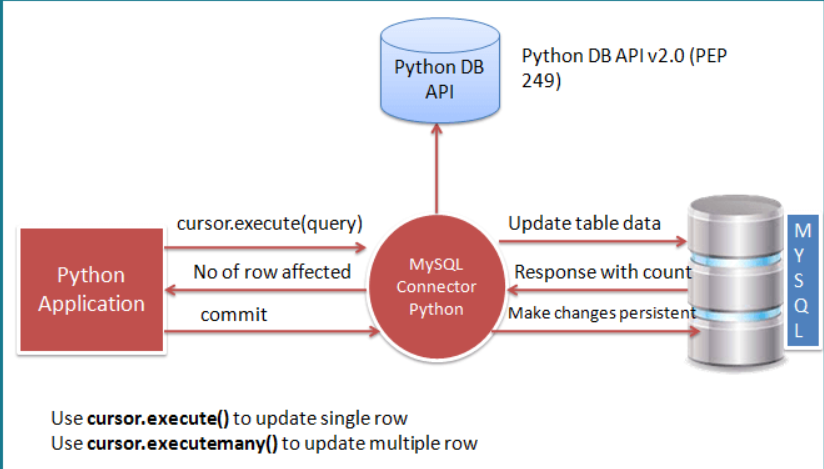

In [62]:
# Update Row with respect id
import mysql.connector

try:
    connection = mysql.connector.connect(**db_config)
    cursor = connection.cursor()

    print("Before updating a record ")
    sql_select_query = """select * from Laptop where id = 1"""
    cursor.execute(sql_select_query)
    record = cursor.fetchone()
    print(record)

    # Update single record now
    sql_update_query = """Update Laptop set Price = 7000 where id = 1"""
    cursor.execute(sql_update_query)
    connection.commit()
    print("Record Updated successfully ")

    print("After updating record ")
    cursor.execute(sql_select_query)
    record = cursor.fetchone()
    print(record)

except mysql.connector.Error as error:
    print("Failed to update table record: {}".format(error))
finally:
    if connection.is_connected():
        connection.close()
        print("MySQL connection is closed")

Before updating a record 
(1, 'Dell', 250000.0, None)
Record Updated successfully 
After updating record 
(1, 'Dell', 7000.0, None)
MySQL connection is closed


#### Note:Don’t forget to close the cursor and database connection objects and Catch any SQL exceptions that may occur during this process We also used <b>commit() and rollback() method. commit() to make changes persistent in the database and rollback() revert the changes if any database error occurred.

In [63]:
#Use a Python variable in MySQL Update query (perameterized query)
import mysql.connector

def update_laptop_price(id, price):
    try:
        connection = mysql.connector.connect(**db_config)

        cursor = connection.cursor()
        sql_update_query = """Update laptop set price = %s where id = %s"""
        input_data = (price, id)
        cursor.execute(sql_update_query, input_data)
        connection.commit()
        print("Record Updated successfully ")

    except mysql.connector.Error as error:
        print("Failed to update record to database: {}".format(error))
    finally:
        if connection.is_connected():
            cursor.close()
            connection.close()
            print("MySQL connection is closed")

update_laptop_price(7500, 1)
update_laptop_price(5000, 2)

Record Updated successfully 
MySQL connection is closed
Record Updated successfully 
MySQL connection is closed


In [65]:
#Update Multiple Rows of MySQL Table using Python
import mysql.connector

try:
    connection = mysql.connector.connect(**db_config)

    cursor = connection.cursor()
    sql_update_query = """Update Laptop set Price = %s where id = %s"""

    # multiple records to be updated in tuple format
    records_to_update = [(3000, 1), (2750, 112)]
    cursor.executemany(sql_update_query, records_to_update)
    connection.commit()

    print(cursor.rowcount, "Records of a laptop table updated successfully")

except mysql.connector.Error as error:
    print("Failed to update records to database: {}".format(error))
finally:
    if connection.is_connected():
        connection.close()
        print("MySQL connection is closed")


1 Records of a laptop table updated successfully
MySQL connection is closed


## Python Delete data from MySQL Table
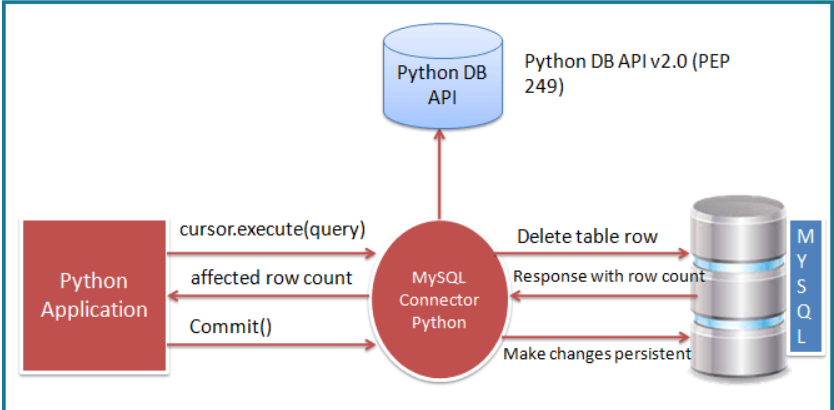

In [66]:
import mysql.connector

try:
    connection = mysql.connector.connect(**db_config)
    cursor = connection.cursor()
    print("Laptop table before deleting a row")
    sql_select_query = """select * from Laptop where id = 7"""
    cursor.execute(sql_select_query)
    record = cursor.fetchone()
    print(record)

    # Delete a record
    sql_Delete_query = """Delete from Laptop where id = 7"""
    cursor.execute(sql_Delete_query)
    connection.commit()
    print('number of rows deleted', cursor.rowcount)

    # Verify using select query (optional)
    cursor.execute(sql_select_query)
    records = cursor.fetchall()
    if len(records) == 0:
        print("Record Deleted successfully ")

except mysql.connector.Error as error:
    print("Failed to delete record from table: {}".format(error))
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")

Laptop table before deleting a row
(7, 'Acer Predator Triton', 2435.0, datetime.date(2024, 1, 23))
number of rows deleted 1
Record Deleted successfully 
MySQL connection is closed


In [67]:
# Use Python Variable in a SQL query to delete data from the table
import mysql.connector

try:
    connection = mysql.connector.connect(**db_config)
    cursor = connection.cursor()
    sql_Delete_query = """Delete from Laptop where id = %s"""
    # row to delete
    laptopId = 6
    cursor.execute(sql_Delete_query, (laptopId,))
    connection.commit()
    print("Record Deleted successfully ")

except mysql.connector.Error as error:
    print("Failed to Delete record from table: {}".format(error))
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")

Record Deleted successfully 
MySQL connection is closed


In [69]:
## Delete many 
import mysql.connector

try:
    connection = mysql.connector.connect(**db_config)

    cursor = connection.cursor()
    sql_Delete_query = """Delete from Laptop where id = %s"""
    records_to_delete = [(1,), (12,)]
    cursor.executemany(sql_Delete_query, records_to_delete)
    connection.commit()
    print(cursor.rowcount, " Record Deleted successfully")

except mysql.connector.Error as error:
    print("Failed to Delete records from MySQL table: {}".format(error))
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")


2  Record Deleted successfully
MySQL connection is closed


## Delete All Rows from the table using truncate

In [70]:
import mysql.connector

try:
    connection = mysql.connector.connect(**db_config)
    cursor = connection.cursor()
    Delete_all_rows = """truncate table Laptop"""
    cursor.execute(Delete_all_rows)
    connection.commit()
    print("All Record Deleted successfully ")

except mysql.connector.Error as error:
    print("Failed to Delete all records from database table: {}".format(error))
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")


## Drop table and Database

In [ ]:
import mysql.connector

try:
    connection = mysql.connector.connect(**db_config)
    cursor = connection.cursor()
    delete_table_query = """DROP TABLE Laptop"""
    cursor.execute(delete_table_query)

    delete_database_query = """DROP DATABASE Electronics"""
    cursor.execute(delete_database_query)
    connection.commit()
    print("Table and Database Deleted successfully ")

except mysql.connector.Error as error:
    print("Failed to Delete table and database: {}".format(error))
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")


## Drop column from the table

In [ ]:
import mysql.connector

try:
    connection = mysql.connector.connect(**db_config)
    cursor = connection.cursor()
    alter_column = """ALTER TABLE Laptop DROP COLUMN Purchase_date"""
    cursor.execute(alter_column)
    connection.commit()
    print("Column Deleted successfully ")

except mysql.connector.Error as error:
    print("Failed to Delete column: {}".format(error))
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")


## Connect to MySQL Using Connector Python C Extension

In [9]:
## Connect to Mysql and show all databases
import mysql.connector as conn
from mysql.connector import Error

try:
    connection=conn.connect(host="localhost",
                            username="root",
                            database="electronics",
                            use_pure=True)
    print("Connected with Mysql Server")
    cursor=connection.cursor()
    cursor.execute("show tables")
    print("Databases are\n",cursor.fetchall())
except Error as e:
    print("Database Error")

Connected with Mysql Server
Databases are
 [('employee',), ('laptop',)]


## Connection pool for python with mySQL
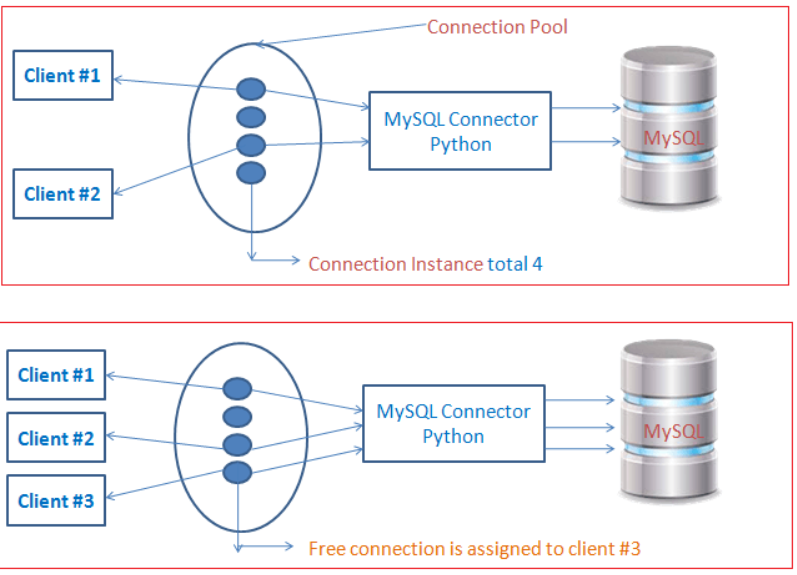

In [15]:
from mysql.connector import Error
from mysql.connector import pooling

try:
    connection_pool = pooling.MySQLConnectionPool(pool_name="mypool_pool",
                                                  pool_size=5,
                                                  pool_reset_session=True,
                                                  host='localhost',
                                                  database='electronics',
                                                  user='root')

    print("Printing connection pool properties ")
    print("Connection Pool Name - ", connection_pool.pool_name)
    print("Connection Pool Size - ", connection_pool.pool_size)

    # Get connection object from a pool
    connection_object = connection_pool.get_connection()

    if connection_object.is_connected():
        db_Info = connection_object.get_server_info()
        print("Connected to MySQL database using connection pool ... MySQL Server version on ", db_Info)

        cursor = connection_object.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("Your connected to - ", record)

except Error as e:
    print("Error while connecting to MySQL using Connection pool ", e)
finally:
    # closing database connection.
    if connection_object.is_connected():
        cursor.close()
        connection_object.close()
        print("MySQL connection is closed")


Printing connection pool properties 
Connection Pool Name -  mypool_pool
Connection Pool Size -  5
Connected to MySQL database using connection pool ... MySQL Server version on  5.5.5-10.4.28-MariaDB
Your connected to -  ('electronics',)
MySQL connection is closed


## Insert / Retrieve file and images as a Blob in MySQL using Python

In [28]:
import mysql.connector

db_config={"host":"localhost",
           "username":"root",
           "database":"electronics"}

def convertToBinaryData(filename):
    # Convert digital data to binary format
    with open(filename, 'rb') as file:
        binaryData = file.read()
        print(binaryData)
    return binaryData


def insertBLOB(emp_id, name, photo, biodataFile):
    print("Inserting BLOB into python_employee table")
    try:
        connection = mysql.connector.connect(**db_config)

        cursor = connection.cursor()
        sql_insert_blob_query = """ INSERT INTO oldemployee
                          (id, name, photo, biodata) VALUES (%s,%s,%s,%s)"""

        empPicture = convertToBinaryData(photo)
        file = convertToBinaryData(biodataFile)

        # Convert data into tuple format
        insert_blob_tuple = (emp_id, name, empPicture, file)
        result = cursor.execute(sql_insert_blob_query, insert_blob_tuple)
        connection.commit()
        print("Image and file inserted successfully as a BLOB into python_employee table", result)

    except mysql.connector.Error as error:
        print("Failed inserting BLOB data into MySQL table {}".format(error))

    finally:
        if connection.is_connected():
            cursor.close()
            connection.close()
            print("MySQL connection is closed")

insertBLOB(1, "Eric", "F:/CYLogo.png","F:/file.txt")
# insertBLOB(2, "Scott", "D:\Python\Articles\my_SQL\images\scott_photo.png",
#            "D:\Python\Articles\my_SQL\images\scott_bioData.txt")


Inserting BLOB into python_employee table
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01-\x00\x00\x01-\x08\x06\x00\x00\x00]\xe36\xee\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00!\xd5\x00\x00!\xd5\x01\x04\x9c\xb4\x9d\x00\x00\xff\xa5IDATx^\xec\xfdu\xa0\x96U\xf6\xfe\x8f\xff\xfe\xfa\xfe\xf1\x99Q\xba1gT8}\x08\x01A\xc9\xd3}\x0e\xdd(&vw7v\xf7X\xd88\x8a\xdd\x05\x06\x88\x81\x05&\nHw\x83\xb0~\xd7k\xedg?\xe7\xe1\x08\xc683:\xbe\xd9\xb0\xcf}?w\xee{\xc7\xb5\xaf\xb5\xf6\xdak\xff\xff\xb6\x87\xed!\x86#N\xbfd\xff\xf9\xab7}\xba`\xb5\xd9\x825f_-2\xfbh\xf6*{s\xc6<{f\xf2\x17\xf6\xe0\x0b\x1f\xda\xed\xff|\xcb.\xbf\xebE;\xf5\xea\'\xec\xc8\x8b\xee\xb3\xd1\xa7\xdc`\xfd\xc7\\hU\x07^hE#\xcf\xb6\x1e\xc3N\xb3^#O\xb7\x82\xe1g[\xc1\x903\xadx\xd0\xd9\x96?\xf0t+\x1cr\xbaU\x8d>\xdf\xfa\x1dx\x89\r?\xfa:;\xe0\xf4[\xed\xe8\xb1\x0f\xday7=cW\xdc\xf3\xaa\xdd>a\xaa=\xf2\xfa\x0c{\xf1\xbd\xd96\xf9\x8b\xc56c\xfe\x1a\xfbn\xe5&\x9b\xaf\xb4|\xb7r\xe3\xa7\xfd\xf6

In [29]:
import mysql.connector


def write_file(data, filename):
    # Convert binary data to proper format and write it on Hard Disk
    with open(filename, 'wb') as file:
        file.write(data)


def readBLOB(emp_id, photo, bioData):
    print("Reading BLOB data from python_employee table")

    try:
        connection = mysql.connector.connect(**db_config)

        cursor = connection.cursor()
        sql_fetch_blob_query = """SELECT * from oldemployee where id = %s"""

        cursor.execute(sql_fetch_blob_query, (emp_id,))
        record = cursor.fetchall()
        for row in record:
            print("Id = ", row[0], )
            print("Name = ", row[1])
            image = row[2]
            file = row[3]
            print("Storing employee image and bio-data on disk \n")
            write_file(image, photo)
            write_file(file, bioData)

    except mysql.connector.Error as error:
        print("Failed to read BLOB data from MySQL table {}".format(error))

    finally:
        if connection.is_connected():
            cursor.close()
            connection.close()
            print("MySQL connection is closed")


readBLOB(1, "F:/eric_photo.png", "F:/name.txt")
# readBLOB(2, "D:\Python\Articles\my_SQL\query_output\scott_photo.png",
#          "D:\Python\Articles\my_SQL\query_output\scott_bioData.txt")


Reading BLOB data from python_employee table
Id =  1
Name =  Eric
Storing employee image and bio-data on disk 

MySQL connection is closed
